<a href="https://colab.research.google.com/github/Sdolskin/learning-classes/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!conda install urllib
import tensorflow as tf
import urllib3.request
#import sklearn.datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
#import wget
print(tf.__version__)

2.12.0


In [2]:
#load in the data using urlib3
#load in the data using wget
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
# IT's why I coudn't do it with wget on jupter Notebook!!!!!!!!!!!

#url = 'https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv'
#filename = 'moore.csv'
#url.request.urlretrieve(url, filename)

--2023-04-12 19:37:31--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2023-04-12 19:37:31 (38.8 MB/s) - ‘moore.csv’ saved [2302/2302]



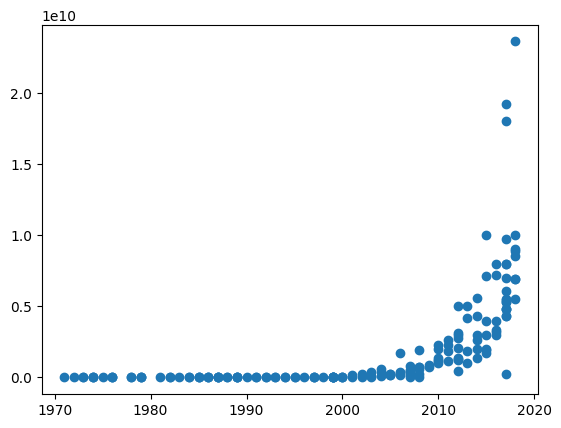

In [3]:
#load in the data
df = pd.read_csv('moore.csv', header=None).values
X = df[:,0].reshape(-1, 1) #make it a 2-D array of size N x D where D = 1
Y = df[:,1]

# Plot the data - it's exponential 
plt.scatter(X, Y)

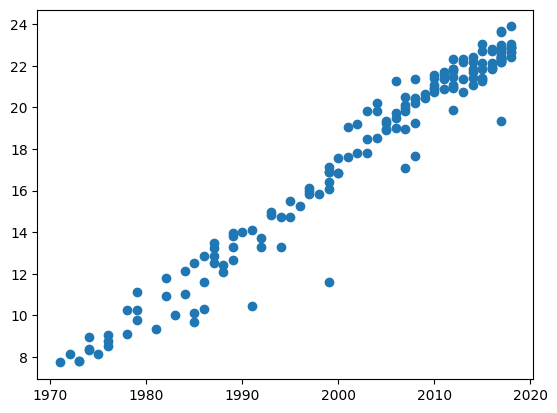

In [4]:
# transform it in a log
Y = np.log(Y)
plt.scatter(X, Y)
# that's better

In [5]:
# Let's also center the X data so the values are not too large
#we could scale it too but then we'd have to reverse the transformation later

X = X - X.mean()

In [ ]:
# Now creating the tensorflow model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')
# model.compcompile(optimizer='adam', loss='mse')

#learning rate scheduler
def schedule(epoch, lr):
    if epoch >= 50:
        return 0.0001
    return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

# Train the model
r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

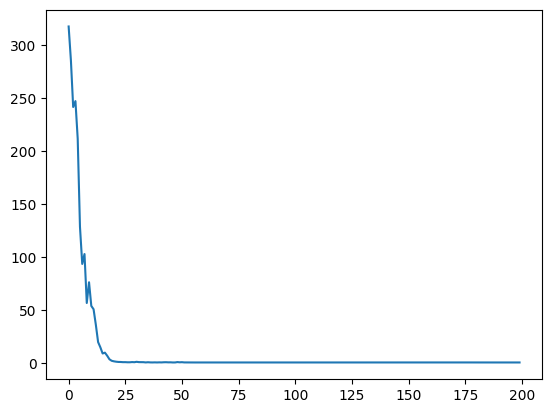

In [7]:
# Ploting the loss
plt.plot(r.history['loss'], label='Loss')

In [8]:
# Get the slope of the line
# the slope of the line is related to the doubling rate of transistor count

print(model.layers) # Note: there is only 1 layer, the "Input" layer doesn't count
print(model.layers[0].get_weights()) 
# frist array is related to W.weights and second array is related to B.weights

[array([[0.34140116]], dtype=float32), array([17.76651], dtype=float32)]


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
# The slope of the line is:
a = model.layers[0].get_weights()[0][0,0]

In [11]:
print("timeto double:", np.log(2)/a)

timeto double: 2.030301188901772


6/6 [==============================] - 0s 2ms/step


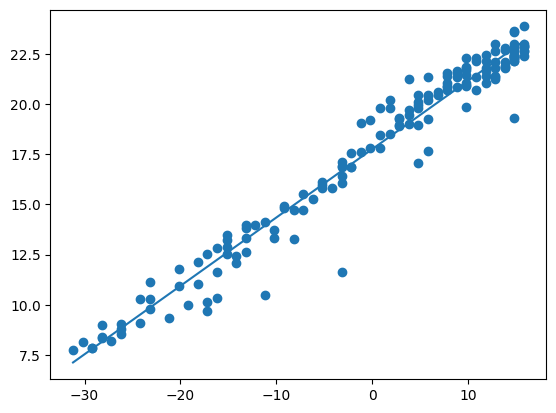

In [14]:
#make sure the line fits the data
Yhat = model.predict(X).flatten()
plt.scatter (X, Y)
plt.plot(X, Yhat)

In [15]:
# Manual Calculation

# Get the weights
w, b = model.layers[0].get_weights()

# Reshape X because of flattened it again earlier
X = X.reshape(-1, 1)

# [N x 1] x (1 x 1) + (1) --> (N x 1)
Yhat2 = (X.dot(w) + b).flatten()

# Don't use == for floating points
np.allclose(Yhat, Yhat2)

True